In [26]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
#uploading data set
data1_1= pd.read_csv('diabetes.csv')
data1_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data1_1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
#can be seen that there are no missing values as this data set is verified 

In [30]:
#trying to find outliers
data1_1.describe()[['Pregnancies', 'Glucose']]
#Glucose,bloodpressure,skin thickness,insulin

,Pregnancies,Glucose
count,768.000000,768.000000
mean,3.845052,120.894531
std,3.369578,31.972618
min,0.000000,0.000000
25%,1.000000,99.000000
50%,3.000000,117.000000
75%,6.000000,140.250000
max,17.000000,199.000000


In [31]:
data1_1.describe()[['SkinThickness', 'BloodPressure','Insulin','DiabetesPedigreeFunction']]

,SkinThickness,BloodPressure,Insulin,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000
mean,20.536458,69.105469,79.799479,0.471876
std,15.952218,19.355807,115.244002,0.331329
min,0.000000,0.000000,0.000000,0.078000
25%,0.000000,62.000000,0.000000,0.243750
50%,23.000000,72.000000,30.500000,0.372500
75%,32.000000,80.000000,127.250000,0.626250
max,99.000000,122.000000,846.000000,2.420000


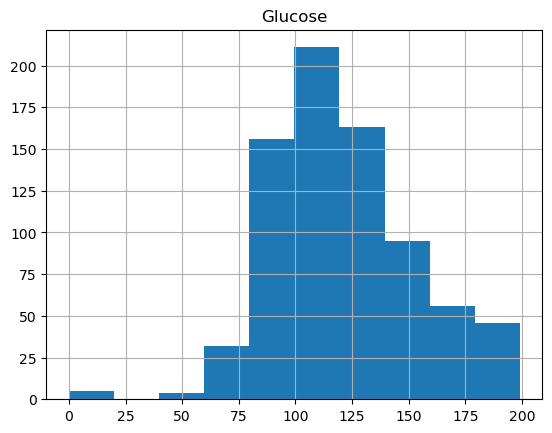

In [32]:
from matplotlib import pyplot
data1_1.hist('Glucose')
pyplot.show()

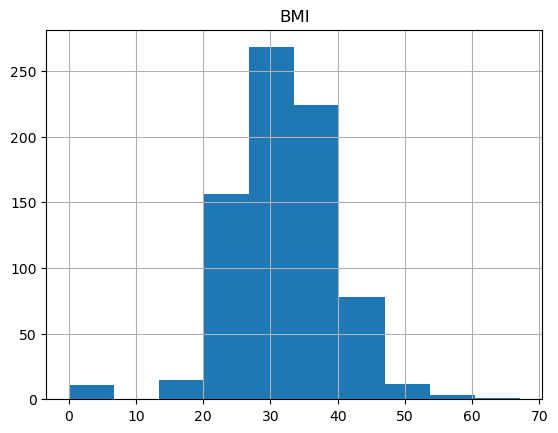

In [33]:
data1_1.hist('BMI')
pyplot.show()

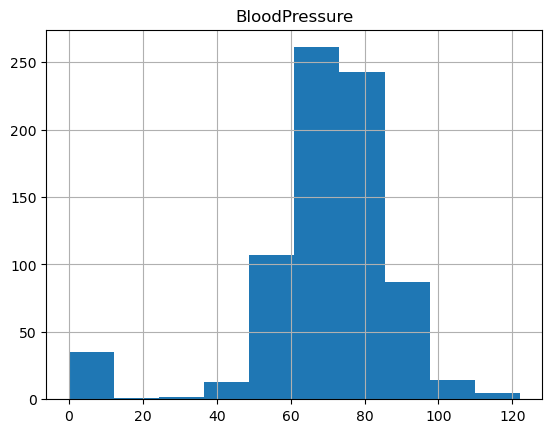

In [34]:
data1_1.hist('BloodPressure')
pyplot.show()

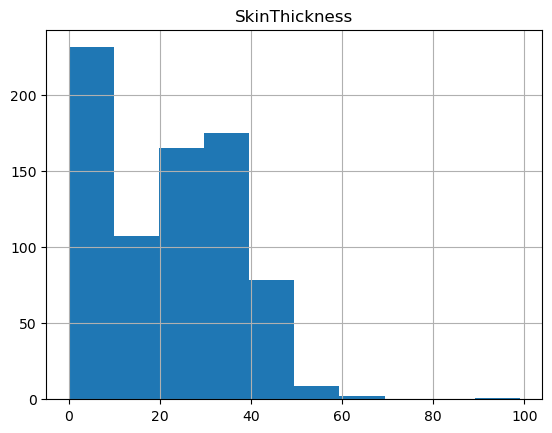

In [35]:
data1_1.hist('SkinThickness')
pyplot.show()

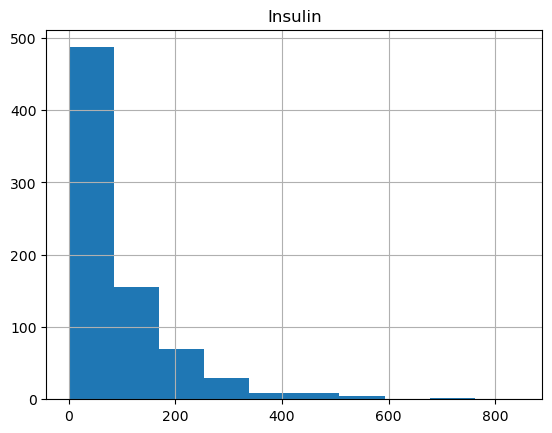

In [36]:
data1_1.hist('Insulin')
pyplot.show()

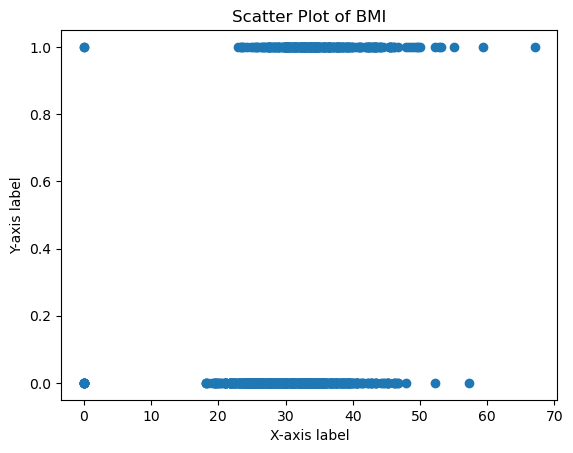

In [37]:
import matplotlib.pyplot as plt
x = data1_1['BMI']
y = data1_1['Outcome']
plt.scatter(x,y)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of BMI')
plt.show()

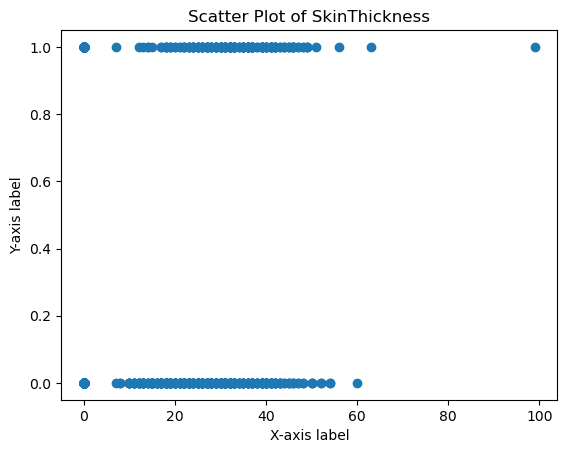

In [38]:
x = data1_1['SkinThickness']
y = data1_1['Outcome']
plt.scatter(x,y)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of SkinThickness')
plt.show()

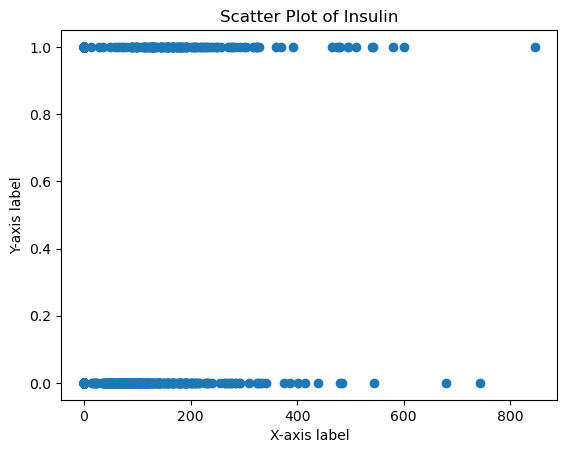

In [39]:
x = data1_1['Insulin']
y = data1_1['Outcome']
plt.scatter(x,y)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of Insulin')
plt.show()

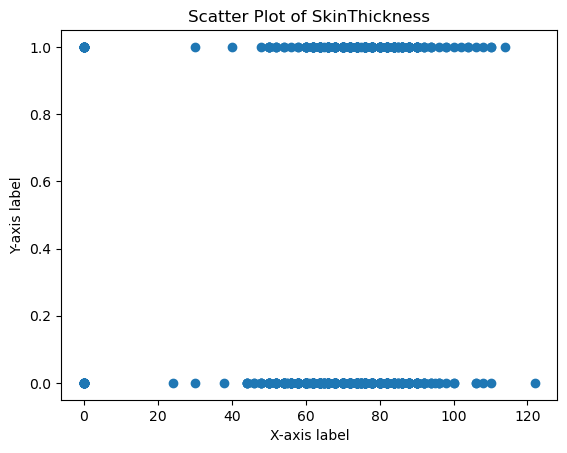

In [40]:
#insulin and bloodpresure have the maximum number of outliers
x = data1_1['BloodPressure']
y = data1_1['Outcome']
plt.scatter(x,y)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of SkinThickness')
plt.show()

In [41]:
data1_1.describe()
#through this table the the difference between mean and max value can be seen which is helpful in telling which column is 
#more prone to outliers


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
#as the outcome is already in boolean value it need not to be changed

In [43]:
#can_t be encoded


In [44]:
#setting independent and dependent variables
x = data1_1.drop("Outcome", axis=1)
y = data1_1['Outcome']
data1_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [47]:
predictions = classifier.predict(X_test)

In [48]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
#=input('')
#1	89	66	23	94	28.1	0.167	21	
k=model.predict([[1,89,66,23,94,28.1,0.167,21]])
print(k)

[1]


In [50]:
if k == 1:
 print('The person is diabetic!\n')
else:
 print('This person is not diabetic.\n')

The person is diabetic!



In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, predictions)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, predictions)
print("Accuracy:",result2)

Confusion Matrix:
[[141  16]
 [ 35  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

Accuracy: 0.7792207792207793


In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred = classifier.predict(X_test)

from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7705627705627706


In [53]:
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7705627705627706


In [54]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[139  18]
 [ 35  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.68      0.53      0.60        74

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231

Accuracy: 0.7705627705627706


In [55]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

In [56]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y1_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [57]:
result = confusion_matrix(y_test, y1_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y1_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y1_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[125  32]
 [ 33  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       157
           1       0.56      0.55      0.56        74

    accuracy                           0.72       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231

Accuracy: 0.7186147186147186


In [58]:
import xgboost as xgb
#dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
#dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [59]:
model = xgb.XGBClassifier(tree_method='hist', n_jobs=-1)
model.fit(X_train, y_train)
y_pred1_1 = model.predict(X_test)

In [60]:
result = confusion_matrix(y_test, y_pred1_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred1_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred1_1)
print("Accuracy:",result2)

Confusion Matrix:
[[126  31]
 [ 30  44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       157
           1       0.59      0.59      0.59        74

    accuracy                           0.74       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231

Accuracy: 0.7359307359307359


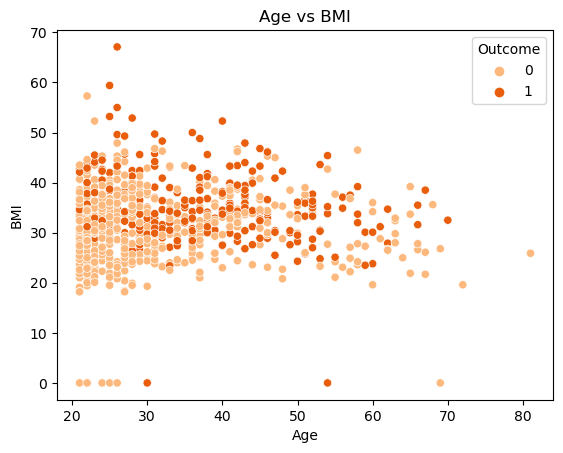

In [66]:
sns.scatterplot(x ='Age', y ='BMI', hue ='Outcome', data= data1_1, palette = 'Oranges')
plt.title('Age vs BMI')
plt.show()